# Volatility decay in Leveraged ETFs
Leveraged ETFs are designed to amplify the returns of a benchmark index by a certain factor, usually 2x or 3x, on a daily basis. 
For example if an ETF promises a return of 2 times the S&P 500 index then if the S&P 500 index goes up 1% in one day the ETF will go up 2 x 1% = 2%.
##
There is a common myth about Leveraged ETFs which states that they are not suitable for long term buy and hold. This article rectifies that deficiency and finds that the claims are false.
##
The explanation popularly given for this myth is that volatility eats away at long term returns. If this were true then non-leveraged funds would also not be suitable for buy and hold because they too suffer from volatility.


## Origins of the myth
Daily volatility hurts the returns of leveraged ETFs (including unleveraged ETFs). The math is simple. If the market goes down by $x$ one day and up by the same $x$ the next day, the net returns after the 2 days are given by:
###
$(1 - x)(1 + x) = 1 - x^2$
###
As $x^2$ is positive but the sign in front is negative, your position will always suffer a loss of $x^2$. For example, if the market goes down 5% one day, then up by 5%. The net result is $(1-0.05)(1+0.05)= 0.9975$; a loss of 0.0025 or 0.25%. 
So whenever the market has volatility we lose money. We call this <i>volatility decay</i>.

Have a look at the graph below to enhance our comprehension of this concept:


 




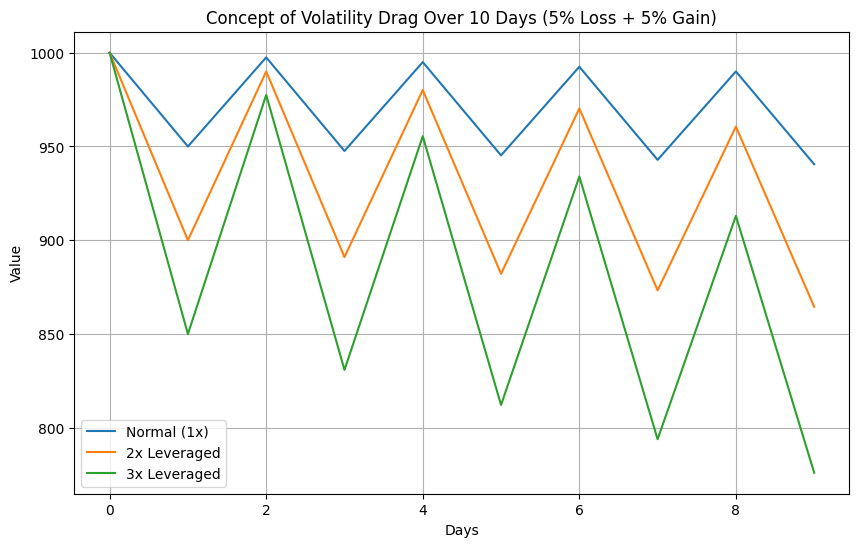

In [1]:
import matplotlib.pyplot as plt
days = list(range(10))  # Use 10 days
normal_etf = [1000, 950, 997.50, 947.62, 995.00, 945.25, 992.51, 942.88, 990.02, 940.52]
leveraged_2x = [1000, 900, 990, 891, 980.10, 882.09, 970.30, 873.27, 960.60, 864.54]
leveraged_3x = [1000, 850, 977.50, 830.87, 955.50, 812.17, 934.00, 793.90, 912.99, 776.04]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged')
plt.plot(days, leveraged_3x, label='3x Leveraged')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Concept of Volatility Drag Over 10 Days (5% Loss + 5% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

Increasing leverage increases the value of $x$, and therefore $x^2$, causing greater volatility decay. Even an ETF with a leverage of 1 has volatility decay. 

The myth has resulted from the belief that volatility decay will drag any leveraged ETF down to zero given enough time. Conventional wisdom has decided that employing no leverage, which is in fact a 1x multiple, might strike the optimal balance between volatility decay and capturing market returns. Yet there’s nothing special about a 1x multiple, nor any inherent reason that 1x leverage is “optimal”. The “optimal” amount of leverage, under historical market conditions, might be 0.8x, 1.2x or 1.5x or some such. It is very unlikely to be neatly 1x. 



In fact, it is no secret that at least in the decade, if an investor used a “buy and hold” strategy on 2x or 3x leveraged ETFs, they would have significantly outperformed a 1x “buy and hold” strategy of the underlying index (see figure 1):


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


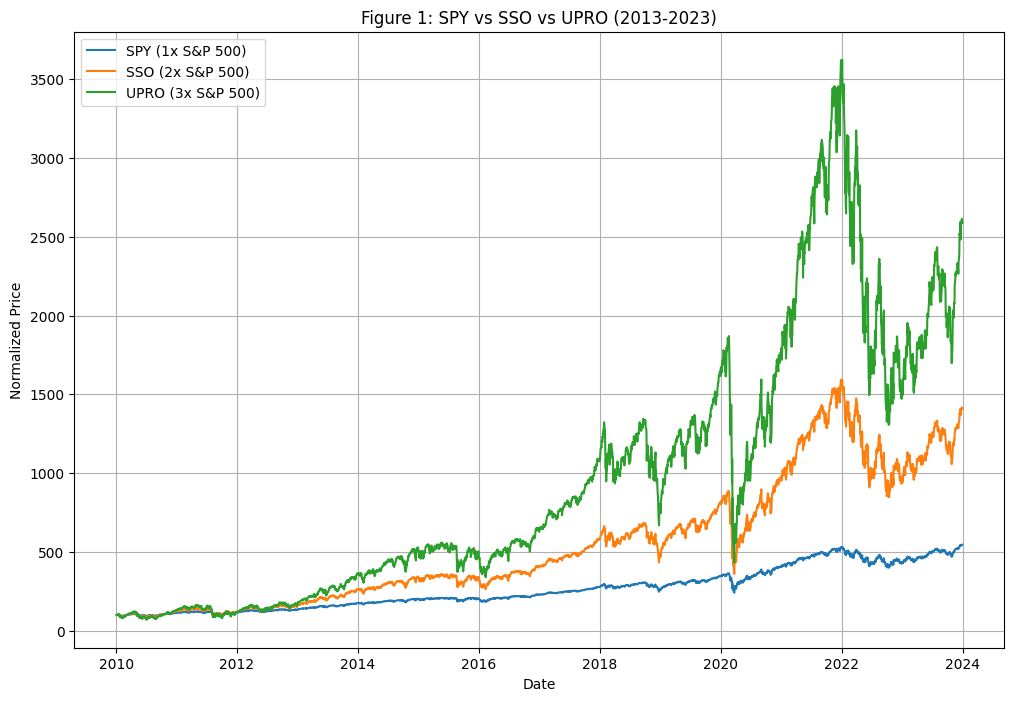

In [4]:
import yfinance as yf

# Download historical data for SPY (1x S&P 500), SSO (2x S&P 500), and UPRO (3x S&P 500)
start_date = '2010-01-01'
end_date = '2024-01-01'
spy = yf.download('SPY', start=start_date, end=end_date)
sso = yf.download('SSO', start=start_date, end=end_date)
upro = yf.download('UPRO', start=start_date, end=end_date)

# Normalize the data to start at the same point
spy['Normalized'] = spy['Adj Close'] / spy['Adj Close'].iloc[0] * 100
sso['Normalized'] = sso['Adj Close'] / sso['Adj Close'].iloc[0] * 100
upro['Normalized'] = upro['Adj Close'] / upro['Adj Close'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(spy['Normalized'], label='SPY (1x S&P 500)')
plt.plot(sso['Normalized'], label='SSO (2x S&P 500)')
plt.plot(upro['Normalized'], label='UPRO (3x S&P 500)')
plt.title('Figure 1: SPY vs SSO vs UPRO (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


Of course, the past decade has seen an almost uninterrupted bull run except for the brief market crash in 2020 from COVID. There’s no question that when the markets go up rapidly, leverage amplifies the gains. The argument against leveraged ETFs always boils down to underperformance when the markets are volatile. 



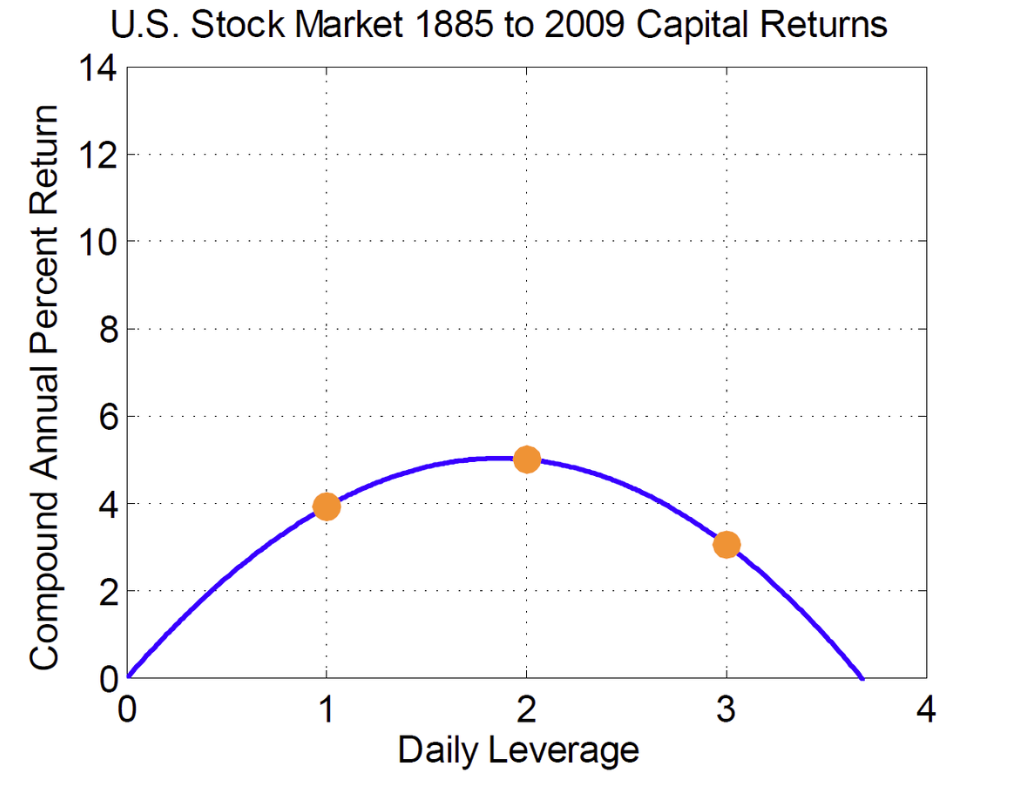
Image source: Cooper, Tony. Alpha Generation and Risk Smoothing Using Managed Volatility. 


As you can see, returns increase as leverage increases, up to the “optimal” amount of leverage to maximize returns, at least for this set of market conditions over this time period,  was not 1x nor 3x, but in fact close to 2x. We also see that as the leverage continues to increase beyond 2x, the returns trail again, due to exponentially increasing volatility drag. 

There is nothing magic about the leverage value 1. There is no mathematical reason for returns to suddenly level off at that leverage. The myth propagators are wrong. Leveraged ETFs can be held long term.

Let's perform a simulation to further provide evidence of this. 

##  SPX Simulation
We will be simulating the a year of the SPX index by calculating the probability of positive days and negative days occuring as well as the frequency of their occurrence based on SPX data from 1927-2023.

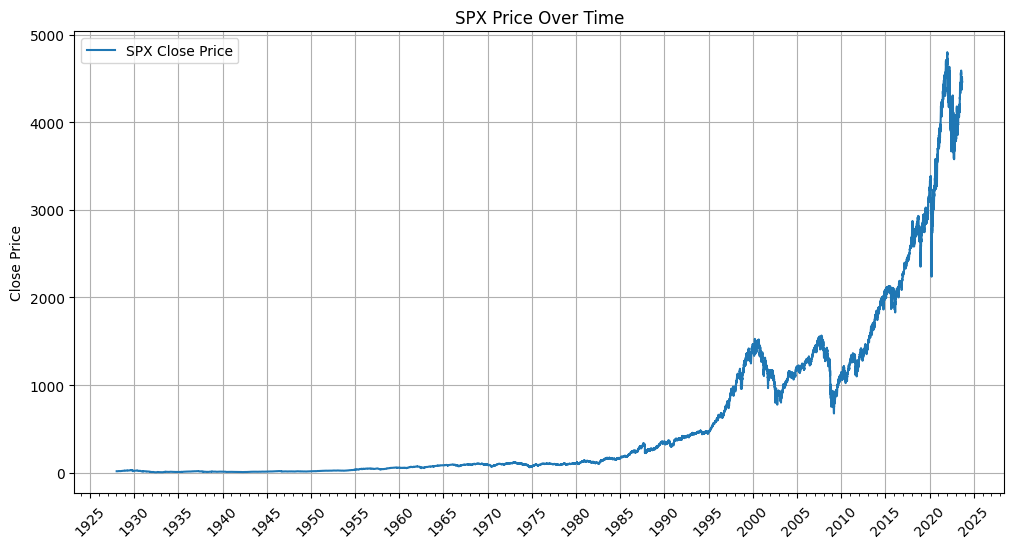

In [15]:
# Imports
import pandas as pd
import matplotlib.dates as mdates
import datetime
import numpy as np
import seaborn as sns

file_path = "data\^SPX.csv"
df = pd.read_csv(file_path)


# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='SPX Close Price')

# Use date formatting for the x-axis ticks (only showing the year)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

# Set minor ticks to display years as well (every year)
plt.gca().xaxis.set_minor_locator(mdates.YearLocator())

plt.ylabel('Close Price')
plt.title('SPX Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Above is a graph containing the close price of SPX. This will be the data we use to perform our calculations.  


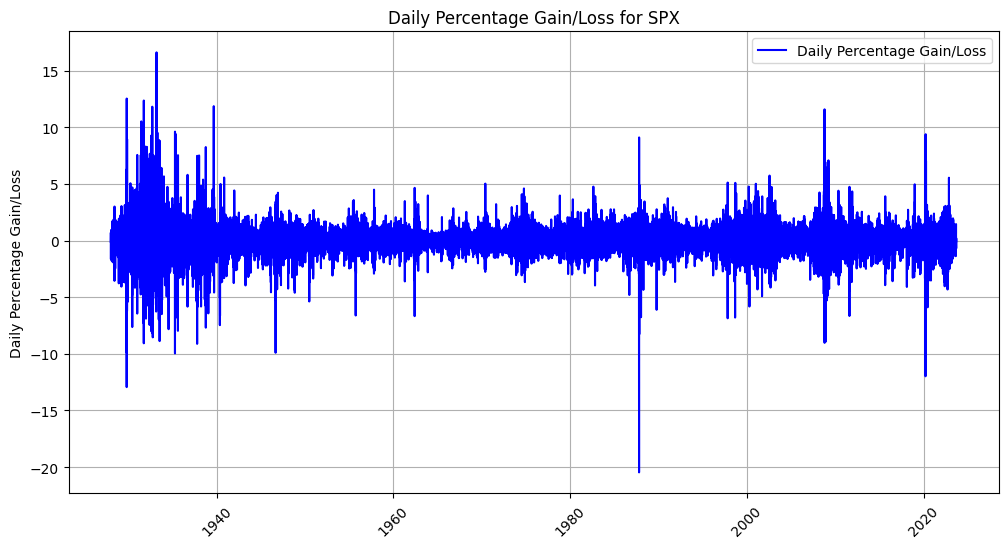

In [16]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Calculate the average daily percentage gain/loss
average_daily_pct_change = df['Daily_Pct_Change'].mean()

# Create a plot for daily percentage gain or loss
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Pct_Change'], label='Daily Percentage Gain/Loss', color='b')

plt.ylabel('Daily Percentage Gain/Loss')
plt.title('Daily Percentage Gain/Loss for SPX')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

This graph displays the daily percentage gains or losses over time. We can see from this that most daily changes are less than 5% in gains/losses. This may suggest that the majority of time, SPX does not going through much volatility. 

In [17]:
# Calculate the daily percentage change
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Count the number of positive, negative, and zero-change days
positive_days = len(df[df['Daily_Pct_Change'] > 0])
negative_days = len(df[df['Daily_Pct_Change'] < 0])
zero_change_days = len(df[df['Daily_Pct_Change'] == 0])
all_days = positive_days + negative_days + zero_change_days

# Calculate the percentage of positive and negative days
percentage_positive_days = (positive_days / all_days) * 100
percentage_negative_days = (negative_days / all_days) * 100

# Print the results to the console
print(f'Number of Positive Days: {positive_days}')
print(f'Number of Losing Days: {negative_days}')
print(f'Number of Zero-Change Days: {zero_change_days}')
print(f'Number of Overall Days: {all_days}')
print(f'Percentage of Positive Days: {percentage_positive_days:.2f}%')
print(f'Percentage of Losing Days: {percentage_negative_days:.2f}%')

Number of Positive Days: 12574
Number of Losing Days: 11143
Number of Zero-Change Days: 313
Number of Overall Days: 24030
Percentage of Positive Days: 52.33%
Percentage of Losing Days: 46.37%


The data above reveals that there have been more positive days than loss days. 

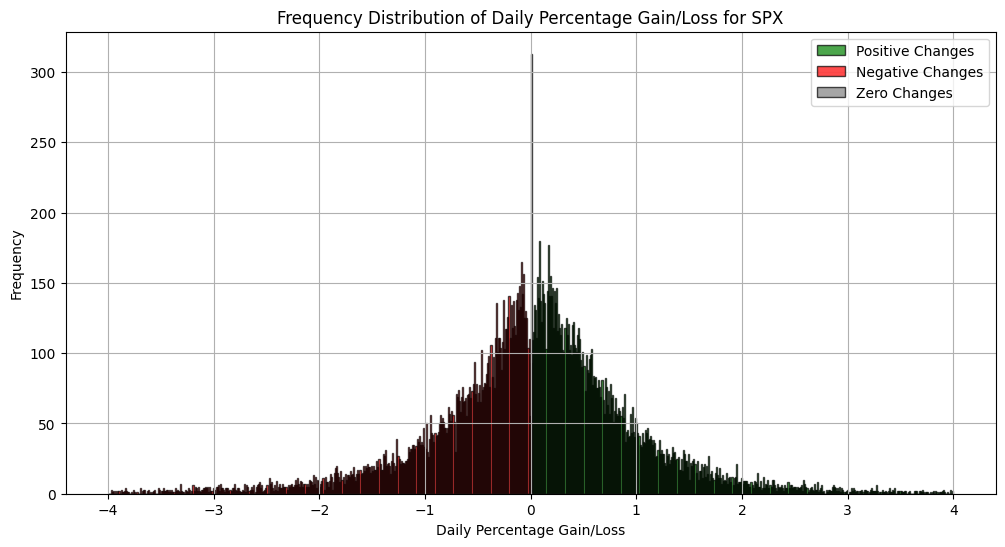

In [18]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Create a plot for the frequency distribution of daily percentage gain or loss
plt.figure(figsize=(12, 6))

# Define bin edges
bin_edges = [-4 + i * 0.01 for i in range(801)]  # 0.01 percentage point intervals from -2% to 2%

# Filter data for positive, negative, and zero changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']
zero_changes = df[df['Daily_Pct_Change'] == 0]['Daily_Pct_Change']

# Create histograms for each category with respective colors
plt.hist(positive_changes, bins=bin_edges, edgecolor='k', color='green', alpha=0.7, label='Positive Changes')
plt.hist(negative_changes, bins=bin_edges, edgecolor='k', color='red', alpha=0.7, label='Negative Changes')
plt.hist(zero_changes, bins=bin_edges, edgecolor='k', color='gray', alpha=0.7, label='Zero Changes')

plt.xlabel('Daily Percentage Gain/Loss')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Daily Percentage Gain/Loss for SPX')
plt.legend()
plt.grid(True)
plt.show()
     

Above is a frequency distribution containing the daily percentage gain/loss. Evidently it exhibits a pattern similiar to that of a binomial distribution. 

In [19]:
# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Filter data for positive and negative changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']

# Calculate the average positive daily percentage
average_positive_pct = positive_changes.mean()

# Calculate the average negative daily percentage
average_negative_pct = negative_changes.mean()

print(f'Average Positive Daily Percentage: {average_positive_pct:.2f}%')
print(f'Average Negative Daily Percentage: {average_negative_pct:.2f}%')

Average Positive Daily Percentage: 0.76%
Average Negative Daily Percentage: -0.79%


We can see that the average negative daily percentage has a greater magnitude than that of the positive. 

However, the frequency of positive occurrences exceeds that of negatives. 

Based on this, we can create an impact factor to equally weigh and compare gains and losses. 

In [20]:
impact_factor = negative_days / positive_days
print(f'The impact_factor: {impact_factor}')

The impact_factor: 0.8861937331000477


In [23]:
True_negative_daily_impact = average_negative_pct * impact_factor
True_positive_daily_impact = average_positive_pct

print(f'Positive daily impact: {True_positive_daily_impact}')
print(f'Negative daily impact: {True_negative_daily_impact}')


Positive daily impact: 0.7600753471857
Negative daily impact: -0.7022110096379331


Here we have adjusted the probability to match that of positive days while concurrently reducing the mean impact associated with negative occurrences. This alteration allows us to simulate the scenario described in the subsequent script, wherein a positive day follows a negative one.



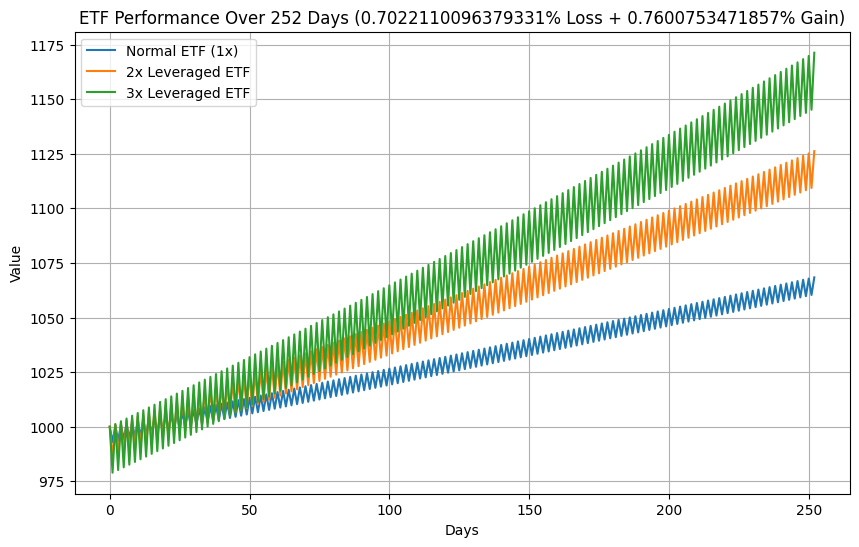

In [24]:
def calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1):
    etf_values = [initial_value]

    for day in range(1, num_days + 1):
        # Determine whether it's a loss or gain day based on the day number
        is_loss_day = (day % 2 == 1)

        # Calculate the daily change based on whether it's a loss day or gain day and the previous day's closing value
        previous_closing_value = etf_values[-1]
        if is_loss_day:
            daily_change = -previous_closing_value * (loss_percentage / 100)
        else:
            daily_change = previous_closing_value * (gain_percentage / 100)

        # Apply leverage
        daily_change *= leverage

        # Update the ETF value for the day
        etf_value = previous_closing_value + daily_change

        # Append the new value to the list
        etf_values.append(etf_value)

    return etf_values

# Parameters
initial_value = 1000
loss_percentage = 0.7022110096379331
gain_percentage = 0.7600753471857
num_days = 252

# Calculate ETF performances with leverage
normal_etf = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1)
leveraged_2x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=2)
leveraged_3x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=3)

# Days
days = list(range(num_days + 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal ETF (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged ETF')
plt.plot(days, leveraged_3x, label='3x Leveraged ETF')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title(f'ETF Performance Over {num_days} Days ({loss_percentage}% Loss + {gain_percentage}% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

As we can see, the leveraged ETFs performed better than the normal ETF in the simulation. 

## Conclusion
If we refer back to the first graph, we demonstrated the perceived negative effect of volatility decay the conseqeuent loss and gain days of 5%. 

However based on the final graph, we can see that since the market always tends to go up, positive daily gains outweigh negative daily losses. This is evident in the final graph, in which the leveraged ETFs outperform unleveraged ETFs. 

The impact of voliatility decay appears to be relatively modest, indicating that many people overestimate its impacts on Leveraged ETFs. This suggests that the benefits of leveraging may outweigh the negative effects of compounding returns during periods of market volatility.

